# Homework11: Time Series Analysis

**1.	What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?**

**Answer:** Continuous numerical data (specifically, interval scale) applies to time series analyses. Time series data is continuous because one could technically slice the data infinitely. Even if visualizing or grouping data by years, months, quarters, etc. there are infinite ways to slice time. Discrete variables are more 'countable' such as the number of books on your bookshelf.

**2.	What does ARIMA stand for? Break down and explain each piece in the name.**

**Answer:** ARIMA stands for "Autoregressive Integrated Moving Average." 

*Autoregressive* means that the predictive variable is regressed on itself (its own prior values) in order to predict an outcome.

*Integrated* means that the values in the model represent a difference. Specifically, the difference between the current value and the previous value. 

*Moving Averages* represent an average that is dynamically and reflexively changing based on prior data points. For example, the 7-day 'moving average' on December 1, 2021 will be calculated based on data 7 days prior to that date. The 7-day 'moving average' on December 10th, 2021 will be calculated based on data 7 days prior to *that* date.

In sum, an ARIMA model can be used to forecast time series data. We can use trends in a variable of interest to predict the outcome of that variable. 

**3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.**

In [164]:
# Load necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data file
temp = pd.read_csv('temperature.csv')

# Inspect the data
temp_df = pd.DataFrame(temp)
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,10/1/2012 13:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,10/1/2012 14:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,10/1/2012 15:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
4,10/1/2012 16:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [165]:
# Create a function that converts Kelvin into Fahrenheit
def Fahrenheit(K):
    # Formular for Fahrenheit
    F = ((K - 273.15)*(9/5))+32
    return F

In [166]:
# Create an empty list to append city names to
city_list = []

# Iterate through columns in data frame and append the city name to the list
for col in temp_df.columns:
    if col != 'datetime':
        city_list.append(col)

# print list to confirm
print(city_list)

['Vancouver', 'Portland', 'San Francisco', 'Seattle', 'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque', 'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City', 'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis', 'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami', 'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal', 'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem']


In [167]:
# Call every column name (from city_list)
# Apply the function we just made to every single column
temp_df[city_list] = temp_df[city_list].apply(Fahrenheit)

# Print first few rows to confirm it worked
temp_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,10/1/2012 13:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,10/1/2012 14:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,10/1/2012 15:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,10/1/2012 16:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


In [168]:
# Reassign data frame to new variable
temp_df_F = temp_df

**4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.**

In [8]:
# Count the NaNs per city to get an overview
# Use 'city_list' from earlier
temp_df_F[city_list].isna().sum()

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

In [9]:
# This is a 'test' slice of the data to see where some of the non-trailing NaNs are
temp_df_F.iloc[3857:3863]

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
3857,3/11/2013 5:00,42.980,43.646,51.3860,42.260,52.412,49.208,53.402,48.974,34.4480,...,34.664,36.644,28.904,28.292,55.1300,54.698,56.6870,60.1700,48.002,51.818
3858,3/11/2013 6:00,42.098,41.900,50.1620,40.370,51.188,48.056,51.386,46.814,33.8360,...,33.440,34.376,27.932,27.608,55.1300,59.000,56.3900,60.1700,51.854,55.706
3859,3/11/2013 7:00,NaN,40.328,47.9264,39.320,NaN,47.600,50.366,NaN,29.1524,...,NaN,33.596,NaN,NaN,61.2884,61.961,62.8070,61.4684,NaN,57.212
3860,3/11/2013 8:00,NaN,38.756,45.6908,38.270,NaN,47.144,49.346,NaN,24.4688,...,NaN,32.816,NaN,NaN,67.4468,64.922,69.2240,62.7668,NaN,58.718
3861,3/11/2013 9:00,41.468,37.184,46.8140,37.220,48.974,46.688,48.326,43.610,31.0460,...,29.822,32.036,29.192,26.924,63.7700,65.156,71.6000,63.4100,63.410,60.224
3862,3/11/2013 10:00,41.882,35.726,45.8780,36.554,47.624,45.626,48.938,42.206,28.2020,...,28.940,30.956,27.338,26.276,67.3700,65.390,70.3526,63.7700,55.004,60.368


In [221]:
# ffill: fills the missing values with the value from the previous cell
# bfill: fills the missing values with the value from proceeding cell

# Define function called "fill NaN, leave trail" shortened as 'fNaN_ltrail()'
# Take in one argument, which is a data set
def fNaN_ltrail(df):
    #import pandas module
    import pandas as pd
    # Use Try, Except for error handling
    try:
        # create deep copy of df object to avoid issues of one dataframe being the reference to another
        new_df = df.copy()
        # Forward fill the NaNs, using the previous cell value
            # However, only complete this action where the back fill would be a value (i.e. not null)
            # this will leave the trailing NaNs at the end of each column
        final_df = new_df.ffill(axis=0).where(new_df.bfill().notnull())
        return final_df
    # Print the error, if there is one
    except Exception as e:
        print(e)

In [222]:
# Test function on our data frame to see if it worked
X = fNaN_ltrail(temp_df_F)
X # trailing NaNs are still there

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,47.930000,NaN,45.806000,68.720000,66.200000,61.502000,70.808000,54.626000,...,62.762000,NaN,35.564000,58.874000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,49.532000,NaN,47.300000,72.554000,67.262000,63.428000,72.392000,55.940000,...,60.962000,NaN,33.764000,55.166000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,50.432000,NaN,49.280000,73.058000,66.974000,64.742000,73.580000,55.922000,...,56.534000,NaN,32.594000,51.422000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,49.766000,NaN,49.658000,72.500000,67.028000,66.200000,75.200000,55.382000,...,52.556000,NaN,30.794000,48.236000,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Check our test location to confirm that the middle NaNs are gone
X.iloc[3857:3863] # middle NaNs are gone!

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
3857,3/11/2013 5:00,42.980,43.646,51.3860,42.260,52.412,49.208,53.402,48.974,34.4480,...,34.664,36.644,28.904,28.292,55.1300,54.698,56.6870,60.1700,48.002,51.818
3858,3/11/2013 6:00,42.098,41.900,50.1620,40.370,51.188,48.056,51.386,46.814,33.8360,...,33.440,34.376,27.932,27.608,55.1300,59.000,56.3900,60.1700,51.854,55.706
3859,3/11/2013 7:00,42.098,40.328,47.9264,39.320,51.188,47.600,50.366,46.814,29.1524,...,33.440,33.596,27.932,27.608,61.2884,61.961,62.8070,61.4684,51.854,57.212
3860,3/11/2013 8:00,42.098,38.756,45.6908,38.270,51.188,47.144,49.346,46.814,24.4688,...,33.440,32.816,27.932,27.608,67.4468,64.922,69.2240,62.7668,51.854,58.718
3861,3/11/2013 9:00,41.468,37.184,46.8140,37.220,48.974,46.688,48.326,43.610,31.0460,...,29.822,32.036,29.192,26.924,63.7700,65.156,71.6000,63.4100,63.410,60.224
3862,3/11/2013 10:00,41.882,35.726,45.8780,36.554,47.624,45.626,48.938,42.206,28.2020,...,28.940,30.956,27.338,26.276,67.3700,65.390,70.3526,63.7700,55.004,60.368


In [29]:
# Count the NaNs per city to get an overview
# Use 'city_list' from earlier
X[city_list].isna().sum() # This looks accurate now! It appears the function worked

Vancouver            793
Portland               1
San Francisco        793
Seattle                1
Los Angeles            1
San Diego              1
Las Vegas              1
Phoenix                1
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 1
Houston                1
Kansas City            1
Minneapolis            1
Saint Louis            1
Chicago                1
Nashville              1
Indianapolis           1
Atlanta                1
Detroit                1
Jacksonville           1
Charlotte              1
Miami                793
Pittsburgh             1
Toronto                1
Philadelphia           1
New York             793
Montreal               1
Boston                 1
Beersheba            793
Tel Aviv District    793
Eilat                792
Haifa                793
Nahariyya            793
Jerusalem            793
dtype: int64

**5.	Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.**

In [30]:
# First, parse out the 'month' from the 'datetime' variable
months = pd.DatetimeIndex(temp['datetime']).month

# group by months
temp_month = temp.groupby(months)

# Find the average temperature per month for every city
avg_temp = temp_month.mean()

In [31]:
# Slice to only have summer months
summer = avg_temp.iloc[5:8,:]
summer

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
6,61.211134,63.236444,64.140963,61.585715,69.568900,66.822850,87.485953,90.288710,74.368036,67.591523,...,71.545015,70.650530,64.621459,66.241696,74.516661,78.412813,85.852445,79.138247,76.161201,76.510843
7,66.156871,68.584739,67.049063,66.018702,73.895957,71.307017,91.613426,93.360678,74.084045,71.845923,...,76.071188,76.408440,70.071057,73.036658,76.818216,81.845361,90.327166,83.194860,80.584995,79.643876
8,66.390721,69.410522,65.948611,66.535748,73.804834,71.667959,87.038608,90.246255,69.698994,68.468004,...,72.801849,73.830452,67.819880,70.821361,78.032980,83.876638,89.778683,84.543222,81.756165,81.760611


In [37]:
# Find the average temperature in the summer for every city
avg_summer = summer.iloc[:,:].mean()

# Create data frame
avg_summer_df = pd.DataFrame({'Summer':avg_summer,
                             'City':avg_summer.index})

In [38]:
# Slice to only have winter months
winter = avg_temp.iloc[[-1,0,1],:]
winter

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
12,37.612746,39.334389,50.036364,39.664553,53.720150,53.918320,43.933624,51.546324,34.258626,29.527251,...,40.131564,39.897939,25.439803,37.244918,52.345612,59.269099,59.336418,61.207427,59.718120,55.889281
1,38.184418,38.449731,50.551496,39.990767,54.338861,54.129665,44.887279,51.894918,33.383405,30.540406,...,31.340689,31.019799,18.444030,29.967281,49.417502,55.635967,55.279762,58.522468,56.164279,52.852690
2,40.616047,42.816971,53.308392,42.738409,56.446170,56.134834,51.210814,57.599249,40.290430,33.352475,...,31.903907,30.972854,17.033908,29.874201,51.923065,57.159229,57.849215,60.319701,58.127902,55.895847


In [39]:
# Find the average temperature in the winter for every city
avg_winter = winter.iloc[:,:].mean()

# Create data frame
avg_winter_df = pd.DataFrame({'Winter':avg_winter,
                             'City':avg_winter.index})

In [40]:
# Combine summer and winter data so that they are in the same data frame
summer_winter = pd.merge(avg_summer_df, avg_winter_df, on='City')
# Set index to city so that data are more readable
summer_winter = summer_winter.set_index('City')

In [54]:
# Transpose the data frame so that the cities are the columns
summer_winter_t = summer_winter.T
# Shorten df name
swt = summer_winter_t
swt

City,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
Summer,64.586242,67.077235,65.712879,64.713388,72.42323,69.932609,88.712662,91.298548,72.717025,69.301817,...,73.472684,73.629807,67.504132,70.033238,76.455952,81.378271,88.652764,82.292110,79.500787,79.305110
Winter,38.804403,40.200364,51.298751,40.797909,54.83506,54.727606,46.677239,53.680163,35.977487,31.140044,...,34.458720,33.963531,20.305914,32.362133,51.228726,57.354765,57.488465,60.016532,58.003433,54.879273


The data frame above displays the average temperature during the summer months (1st row) and the average temperature during the winter months (2nd row) for each city. Now that the data are organized in this manner, we can check to see which cities do NOT have a 'temperate' climate. In other words, which cities are warmer than another in the summer, yet colder than another in the winter.

In [82]:
# Import itertools to get possible combinations of columns with each other
import itertools

# Empty list to store column indexes
column_index = []

# Append column indexes to list
for i in range(0,36):
    column_index.append(i)

In [85]:
# Use the itertools to create a combination of the column indexes
  # All possible combos of City A with City B
combo = list(itertools.combinations(column_index,2))

In [93]:
# Extract the elements from the combo list created earlier to get all combinations
for i,j in combo:
    # If city A is greater than city B in the summer, it is warmer
    # If city A is less than city B in the winter, it is colder
    if (swt.iloc[0,i] > swt.iloc[0,j]) & (swt.iloc[1,i] < swt.iloc[1,j]):
        print(swt.columns[i] +' is extreme, compared to ' + swt.columns[j])
    else:
        print(swt.columns[i]+ ' is temperate, compared to ' + swt.columns[j])

# Output prints all possible combinations of City A with City B

Vancouver is temperate, compared to Portland
Vancouver is temperate, compared to San Francisco
Vancouver is temperate, compared to Seattle
Vancouver is temperate, compared to Los Angeles
Vancouver is temperate, compared to San Diego
Vancouver is temperate, compared to Las Vegas
Vancouver is temperate, compared to Phoenix
Vancouver is temperate, compared to Albuquerque
Vancouver is temperate, compared to Denver
Vancouver is temperate, compared to San Antonio
Vancouver is temperate, compared to Dallas
Vancouver is temperate, compared to Houston
Vancouver is temperate, compared to Kansas City
Vancouver is temperate, compared to Minneapolis
Vancouver is temperate, compared to Saint Louis
Vancouver is temperate, compared to Chicago
Vancouver is temperate, compared to Nashville
Vancouver is temperate, compared to Indianapolis
Vancouver is temperate, compared to Atlanta
Vancouver is temperate, compared to Detroit
Vancouver is temperate, compared to Jacksonville
Vancouver is temperate, compare

**6.	For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.**

**Answer:** Rolling averages are a *type* of moving average. Rolling averages have a 'weight' applied to them that helps smooth out the function. Usually, more recent data points get weighted more heavily than older data points.

The output above shows that "Phoenix is extreme, compared to San Antonio." The output also shows that "Houston is extreme, compared to Haifa." For this reason, I will select the following cities for this analysis:
1. Phoenix
2. Houston

Questions:

Rolling Average
- Do we need to first remove the seasonality from the data set?
- Which data set to we use? (e.g. full/original, modified, etc.)

SARIMA
- How do we select orders in a SARIMA model?

**Phoenix**

In [200]:
# Change to datetime variable
temp_df_F['datetime'] = pd.to_datetime(temp_df_F['datetime']) 

# Set the index to the datetime variable
new = temp_df_F.set_index('datetime')

In [201]:
#find means for each value for each month, so that we have monthly, rather than hourly data
month_temp = new.resample('M').mean()

# resample by day for comparison
day_temp = new.resample('D').mean()

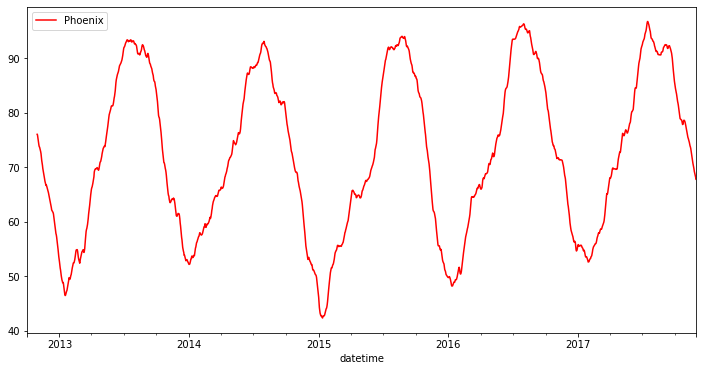

In [202]:
# Create a rolling average, using 30 observations and weighting by the mean
rolling = day_temp['Phoenix'].rolling(window=30, win_type='boxcar')
# Calculate the mean from the rolling window
rolling_mean = rolling.mean()
# Create data frame from rolling_mean
rolling_mean_df = pd.DataFrame(rolling_mean)
# plot the moving average
rolling_mean_df.plot(figsize=(12,6), color='red')
# Display the plot
plt.show()

**Houston**

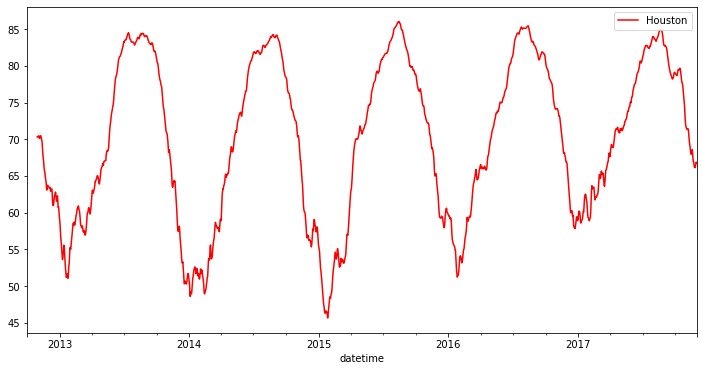

In [203]:
# Create a rolling average, using 30 observations and weighting by the mean
rolling2 = day_temp['Houston'].rolling(window=30, win_type='boxcar')
# Calculate the mean from the rolling window
rolling_mean2 = rolling2.mean()
# Create data frame from rolling_mean
rolling_mean_df2 = pd.DataFrame(rolling_mean2)
# plot the moving average
rolling_mean_df2.plot(figsize=(12,6), color='red')
# Display the plot
plt.show()

**7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.**
    
    **Graph the predicted values 30 days out.**

In [ ]:
# D the number of transformation needed to make stationary the time series = 1
# P indicates the Auto Regressive order for the seasonal component
# Q indicated the Moving Average order for the seasonal component
# M indicates the periodicity, i.e. the number of periods in season, such as 12 for monthly data. = 8760

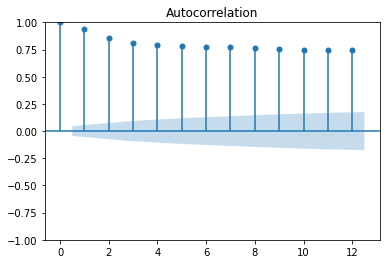

In [214]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(day_temp['Atlanta'], lags =12, missing='drop')
plt.show()

In [206]:
# Selected cities: Atlanta, Miami, Detroit, Seattle, and Denver

# Import module to use SARIMAX function 
# The 'X' just means you can also use exogonous variables, if needed. 
     # exogonous = variables not affected by other variables
from statsmodels.tsa.statespace.sarimax import SARIMAX

# define model configuration

# Trend elements
   # p = autoregression order = 1
   # d = difference order = 1
   # q = moving average order = 1
my_order = (1, 1, 1)

# Seasonal Elements
    # P = seasonal autoregression order = 1
    # D = seasonal difference order = 1
    # Q = seasonal moving average order = 1
    # m = time step for single seasonal period = 12 (12 months in the year).
my_seasonal_order = (1, 1, 1, 12)

In [215]:
# Drop NAs from data set
temp_no_na = day_temp.dropna()

# Make a city list to iterate through
city_list = ['Atlanta', 'Miami', 'Detroit', 'Seattle', 'Denver']

# Iterate through city list
for city in city_list:
    # Run SARIMA
    SARIMAX(day_temp[city], order=my_order, seasonal_order=my_seasonal_order)

In [216]:
# Run the model only on Seattle
model = SARIMAX(day_temp['Seattle'], order=my_order, seasonal_order=my_seasonal_order)
model

In [217]:
#Fit the model to only Seattle
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Seattle   No. Observations:                 1887
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4920.773
Date:                            Sun, 05 Dec 2021   AIC                           9851.545
Time:                                    17:46:04   BIC                           9879.225
Sample:                                10-01-2012   HQIC                          9861.742
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3224      0.139     -2.324      0.020      -0.594      -0.051
ma.L1          0.4493      0.128      3.497      0.000       0.197       0.701
ar.S.L12       0.0012      0.023      0.053      0.957      -0.044       0.046
ma.S.L12      -0.9994      0.129     -7.735      0.000      -1.253      -0.746
sigma2        10.8256      1.404      7.708      0.000       8.073      13.578
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                81.09
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [220]:
#plot the forecasted temperature for the next 30 days
results_df = pd.DataFrame(results.forecast(steps=30))
results_df.tail()

,predicted_mean
2017-12-26,50.173958
2017-12-27,49.981283
2017-12-28,50.336325
2017-12-29,50.598682
2017-12-30,50.947897


<AxesSubplot:>

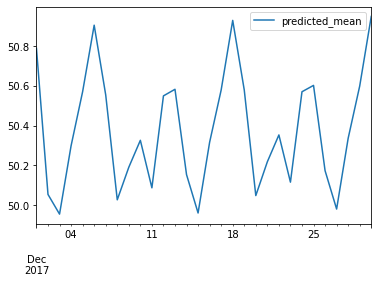

In [219]:
results_df.plot()

**8.	Explain what you see when you perform results.summary() on the cities in question 7.**

**Bonus:**

What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.

### Data Camp Completion Certificate

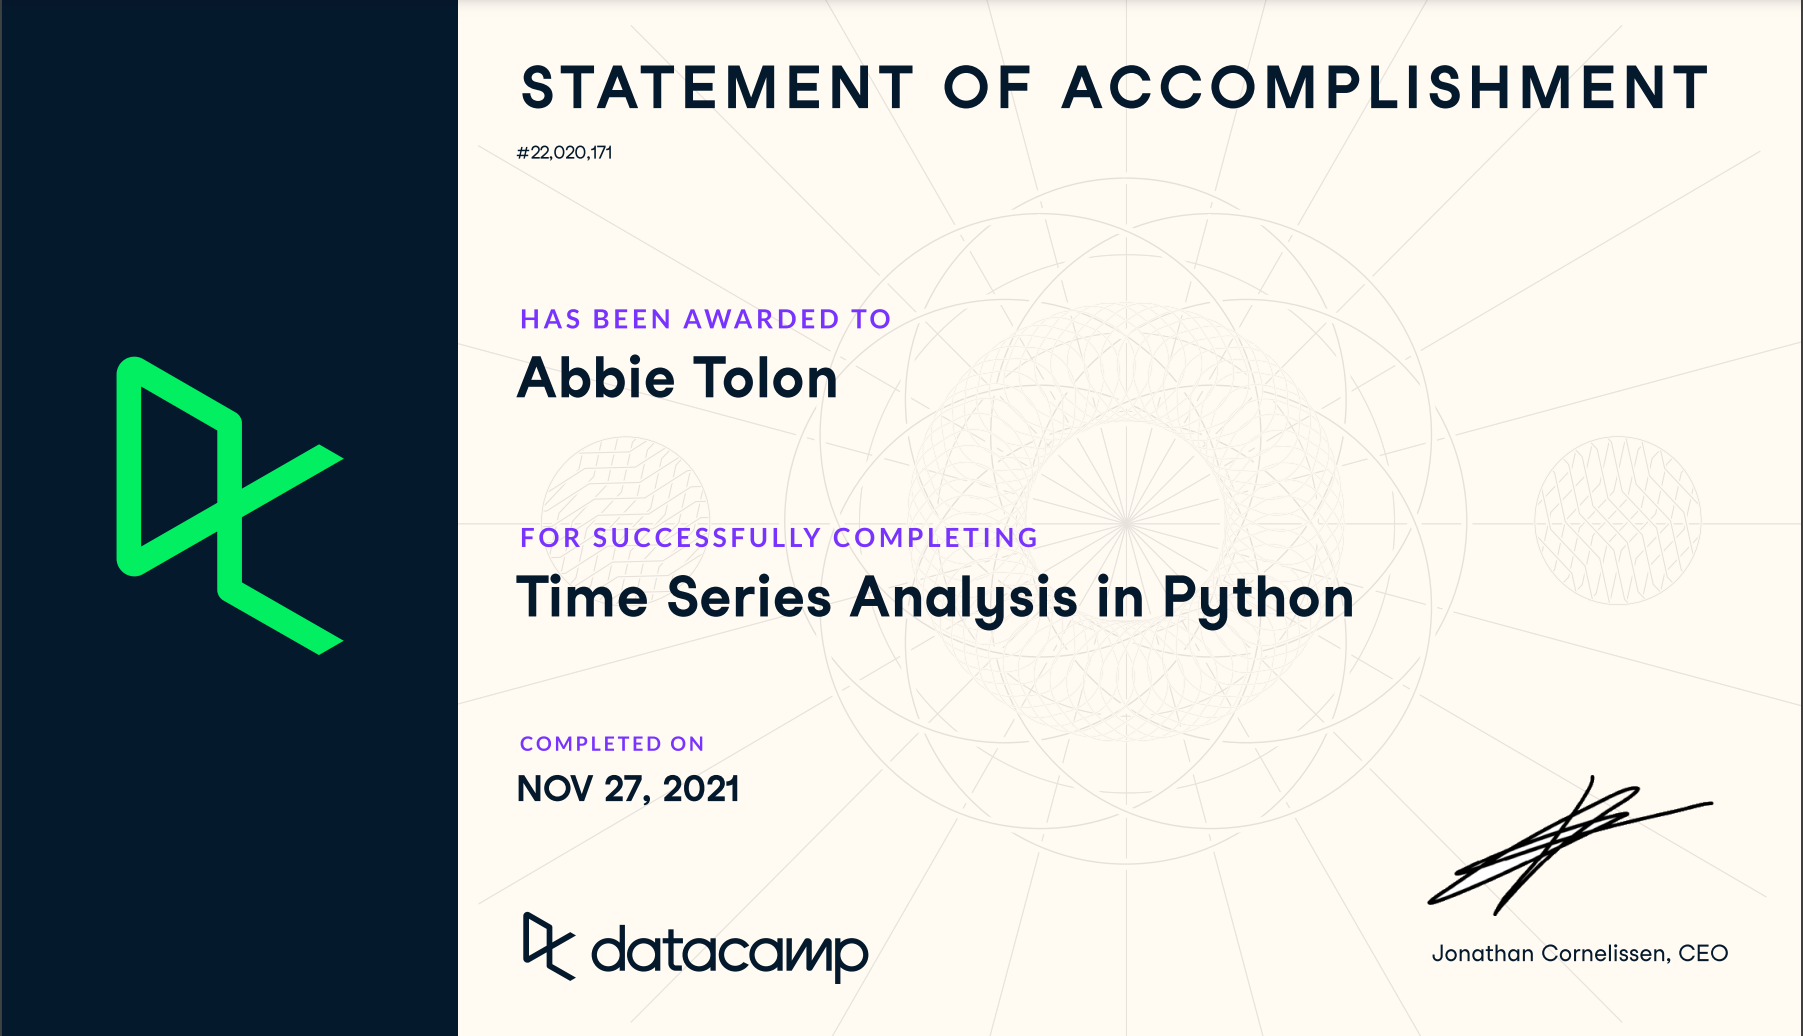